In [1]:
import pandas as pd

In [2]:
permission_path = r'주택건설인허가실적.xlsx'
permission_raw = pd.read_excel(permission_path, skiprows=10, index_col = 0)
permission_raw.head()

,2007년 01월,2007년 02월,2007년 03월,2007년 04월,2007년 05월,2007년 06월,2007년 07월,2007년 08월,2007년 09월,2007년 10월,...,2019년 01월,2019년 02월,2019년 03월,2019년 04월,2019년 05월,2019년 06월,2019년 07월,2019년 08월,2019년 09월,2019년 10월
지 역,,,,,,,,,,,,,,,,,,,,,
전국,12038,17751,20038,19186,30593,30830,45848,48461,55745,103817,...,32023,42254,50863,35616,29398,36440,27574,28776,31271,39757
서울,1530,794,1888,1963,1866,1893,7338,11719,13182,8146,...,8065,5307,14885,3443,3377,2566,3764,4331,2661,2987
부산,455,1099,2121,364,897,235,9678,6688,5079,6098,...,1921,1717,785,1700,686,1135,1822,421,1692,1383
대구,818,2731,1047,514,575,887,439,754,2305,75,...,471,1547,1117,1828,2271,1105,2799,1498,2152,3186
인천,69,116,930,3337,211,5349,1207,1401,4464,8846,...,932,9314,2908,2962,2188,3581,3689,7205,1485,3732


In [3]:
transposed_permission = permission_raw.T
transposed_permission.head()

지 역,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
2007년 01월,12038,1530,455,818,69,1022,55,183,-,2647,452,188,1004,888,206,698,1691,132
2007년 02월,17751,794,1099,2731,116,1178,34,1173,-,2870,190,305,1306,602,494,2244,2515,100
2007년 03월,20038,1888,2121,1047,930,1347,65,685,-,3188,389,694,1890,663,391,2314,2321,105
2007년 04월,19186,1963,364,514,3337,226,81,2281,-,3987,1154,464,701,474,1219,1224,1049,148
2007년 05월,30593,1866,897,575,211,2071,511,244,-,13168,513,680,3087,311,353,850,5178,78


In [7]:
tmp = '2007년 01월'
tmp_list = tmp.split(" ")
tmp_list[0][0:4]+"."+tmp_list[1][:2]

'2007.01'

In [8]:
new_index = []
for date in transposed_permission.index:
    tmp_list = date.split(" ")
    new_index.append(tmp_list[0][0:4]+"."+tmp_list[1][:2])

In [9]:
transposed_permission.index = pd.to_datetime(new_index)
transposed_permission.columns.name = None
transposed_permission.head()

,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
2007-01-01,12038,1530,455,818,69,1022,55,183,-,2647,452,188,1004,888,206,698,1691,132
2007-02-01,17751,794,1099,2731,116,1178,34,1173,-,2870,190,305,1306,602,494,2244,2515,100
2007-03-01,20038,1888,2121,1047,930,1347,65,685,-,3188,389,694,1890,663,391,2314,2321,105
2007-04-01,19186,1963,364,514,3337,226,81,2281,-,3987,1154,464,701,474,1219,1224,1049,148
2007-05-01,30593,1866,897,575,211,2071,511,244,-,13168,513,680,3087,311,353,850,5178,78


### 함수

In [2]:
def permission_processing(path):
    permission_raw = pd.read_excel(path, skiprows=10, index_col = 0)
    transposed_permission = permission_raw.T
    new_index = []
    for date in transposed_permission.index:
        tmp_list = date.split(" ")
        new_index.append(tmp_list[0][0:4]+"."+tmp_list[1][:2])
    transposed_permission.index = pd.to_datetime(new_index)
    transposed_permission.columns.name = None
    return transposed_permission

In [4]:
transposed_permission = permission_processing(r'주택건설인허가실적.xlsx')
transposed_permission.head()

,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
2007-01-01,12038,1530,455,818,69,1022,55,183,-,2647,452,188,1004,888,206,698,1691,132
2007-02-01,17751,794,1099,2731,116,1178,34,1173,-,2870,190,305,1306,602,494,2244,2515,100
2007-03-01,20038,1888,2121,1047,930,1347,65,685,-,3188,389,694,1890,663,391,2314,2321,105
2007-04-01,19186,1963,364,514,3337,226,81,2281,-,3987,1154,464,701,474,1219,1224,1049,148
2007-05-01,30593,1866,897,575,211,2071,511,244,-,13168,513,680,3087,311,353,850,5178,78


In [7]:
unsold_path = r'시·군·구별+미분양현황_2082_128_20200108112740.xlsx'
unsold_raw = pd.read_excel(unsold_path, skiprows = 1, index_col = 0)
unsold_raw.head()

,시군구,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
구분,,,,,,,,,,,,,,,,,,,,,
서울,계,697.0,590.0,687.0,685.0,704.0,778.0,840.0,730.0,724.0,...,50,770,292.0,178,123,190,205,207,191,176
부산,계,8680.0,8576.0,8548.0,8074.0,7964.0,9212.0,9557.0,9925.0,10739.0,...,5228,5296,5401.0,5220,4982,4855,4644,4562,4380,2884
대구,계,9467.0,9134.0,9189.0,9009.0,10888.0,12489.0,12179.0,12075.0,11944.0,...,738,706,1585.0,1814,1739,1818,1736,1550,1362,1236
인천,계,243.0,312.0,266.0,219.0,362.0,883.0,797.0,635.0,507.0,...,1799,2454,2105.0,3478,3632,2778,1557,1046,836,839
광주,계,7005.0,6246.0,5905.0,5829.0,7842.0,8272.0,7186.0,7433.0,7294.0,...,49,45,40.0,40,39,39,181,139,95,180


In [8]:
del unsold_raw['시군구']
transposed_unsold = unsold_raw.T
transposed_unsold.index = pd.to_datetime(transposed_unsold.index)
transposed_unsold.columns.name = None
transposed_unsold.head()

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주,세종
2007-01-01,697.0,8680.0,9467.0,243.0,7005.0,819.0,1180.0,819.0,5312.0,2548.0,7449.0,5179.0,5374.0,6210.0,11772.0,77.0,NaN
2007-02-01,590.0,8576.0,9134.0,312.0,6246.0,803.0,1210.0,3361.0,5344.0,2645.0,7363.0,5098.0,5253.0,5952.0,11563.0,96.0,NaN
2007-03-01,687.0,8548.0,9189.0,266.0,5905.0,1048.0,1687.0,2579.0,5801.0,2565.0,7446.0,5184.0,4887.0,5854.0,11328.0,188.0,NaN
2007-04-01,685.0,8074.0,9009.0,219.0,5829.0,1020.0,1521.0,2488.0,5460.0,3632.0,8250.0,4812.0,4664.0,5419.0,12149.0,162.0,NaN
2007-05-01,704.0,7964.0,10888.0,362.0,7842.0,957.0,1500.0,2488.0,5212.0,4012.0,9195.0,4625.0,4640.0,6303.0,11723.0,156.0,NaN


In [9]:
def unsold_preprocessing(path):
    unsold_raw = pd.read_excel(unsold_path, skiprows = 1, index_col = 0)
    del unsold_raw['시군구']
    transposed_unsold = unsold_raw.T
    transposed_unsold.index = pd.to_datetime(transposed_unsold.index)
    transposed_unsold.columns.name = None
    return transposed_unsold
    

In [10]:
from utils import *

In [11]:
kb_path = 'KB_ts.xls'
price_index = KBpriceindex_preprocessing(kb_path, '매매종합')
jun_index = KBpriceindex_preprocessing(kb_path, '전세종합')

In [12]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib import style
style.use('ggplot')
%matplotlib inline

In [13]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus']=False

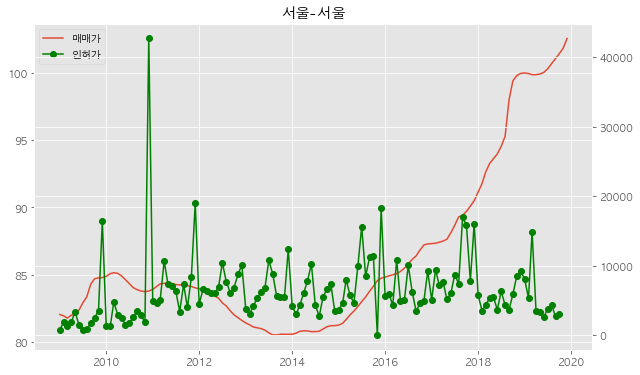

In [17]:
plt.figure(figsize=(10, 6))
ax = plt.subplot()
ax2 = ax.twinx() # x축만 공유하는 새로운 그래프를 생성
si = '서울'
gu = '서울'

plt.title(si + "-" + gu)
# 각각의 그래프에 데이터를 plot함 (ln1, ln2는 x축을 공유, y축이 다름.)
ln1 = ax.plot(price_index[si][gu]['2009-1' : ], label='매매가')
ln2 = ax2.plot(transposed_permission[si]['2009-1' : ], label='인허가', color='green', marker='o')
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')
plt.show()

In [20]:
year_permission = transposed_permission.groupby(transposed_permission.index.year).sum()
year_permission

,전국,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주
2007,555792,62842,41254,18174,41571,13088,11180,24507,198138,10677,19983,29317,11842,15255,24285,31503,2176
2008,371285,48417,13594,22880,33632,3945,14556,5897,115531,13235,10014,21657,12063,10849,15881,24375,4759
2009,381787,36090,6506,6645,59519,5024,1849,6728,159549,12312,11537,22860,11634,8984,13316,17119,2115
2010,386542,69190,18331,4724,37477,4487,4034,4904,143551,9312,8504,15331,12299,17599,13684,18234,4881
2011,549594,88060,37256,12462,35905,16059,19736,13146,148191,12989,18010,46794,16117,15576,16936,39339,13018
2012,586884,86123,42333,13012,32132,19584,6708,9751,151035,12156,24773,44450,24288,22222,25713,44760,10256
2013,440116,77621,29922,18078,18907,8454,5180,5344,96082,12964,19267,32343,13179,20061,23878,34683,6309
2014,515251,65249,17210,19079,13583,11056,5073,12502,163057,12977,16391,35564,13768,17628,41438,49424,8805
2015,765328,101235,33535,27118,30590,14673,7987,12459,276948,18868,31125,40311,22552,15631,53046,45325,18690
2016,726048,74739,36664,23169,22186,22796,13509,16325,244237,29489,29516,31800,28737,20983,36551,61124,21596


In [22]:
modified_permission = year_permission.shift(2)
tmp = []
for year in modified_permission.index:
    tmp.append(str(year) + "-6-1")
modified_permission.index = pd.to_datetime(tmp)

In [23]:
modified_permission

,전국,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주
2007-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-06-01,555792.0,62842.0,41254.0,18174.0,41571.0,13088.0,11180.0,24507.0,198138.0,10677.0,19983.0,29317.0,11842.0,15255.0,24285.0,31503.0,2176.0
2010-06-01,371285.0,48417.0,13594.0,22880.0,33632.0,3945.0,14556.0,5897.0,115531.0,13235.0,10014.0,21657.0,12063.0,10849.0,15881.0,24375.0,4759.0
2011-06-01,381787.0,36090.0,6506.0,6645.0,59519.0,5024.0,1849.0,6728.0,159549.0,12312.0,11537.0,22860.0,11634.0,8984.0,13316.0,17119.0,2115.0
2012-06-01,386542.0,69190.0,18331.0,4724.0,37477.0,4487.0,4034.0,4904.0,143551.0,9312.0,8504.0,15331.0,12299.0,17599.0,13684.0,18234.0,4881.0
2013-06-01,549594.0,88060.0,37256.0,12462.0,35905.0,16059.0,19736.0,13146.0,148191.0,12989.0,18010.0,46794.0,16117.0,15576.0,16936.0,39339.0,13018.0
2014-06-01,586884.0,86123.0,42333.0,13012.0,32132.0,19584.0,6708.0,9751.0,151035.0,12156.0,24773.0,44450.0,24288.0,22222.0,25713.0,44760.0,10256.0
2015-06-01,440116.0,77621.0,29922.0,18078.0,18907.0,8454.0,5180.0,5344.0,96082.0,12964.0,19267.0,32343.0,13179.0,20061.0,23878.0,34683.0,6309.0
2016-06-01,515251.0,65249.0,17210.0,19079.0,13583.0,11056.0,5073.0,12502.0,163057.0,12977.0,16391.0,35564.0,13768.0,17628.0,41438.0,49424.0,8805.0


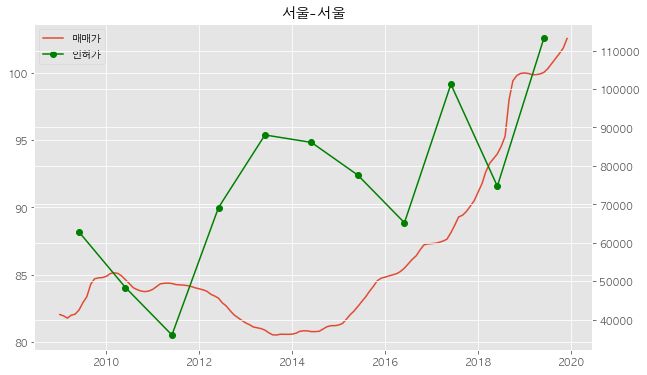

In [24]:
plt.figure(figsize=(10, 6))
ax = plt.subplot()
ax2 = ax.twinx() # x축만 공유하는 새로운 그래프를 생성
si = '서울'
gu = '서울'

plt.title(si + "-" + gu)
# 각각의 그래프에 데이터를 plot함 (ln1, ln2는 x축을 공유, y축이 다름.)
ln1 = ax.plot(price_index[si][gu]['2009-1' : ], label='매매가')
ln2 = ax2.plot(modified_permission[si]['2009' : ], label='인허가', color='green', marker='o')
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')
plt.show()

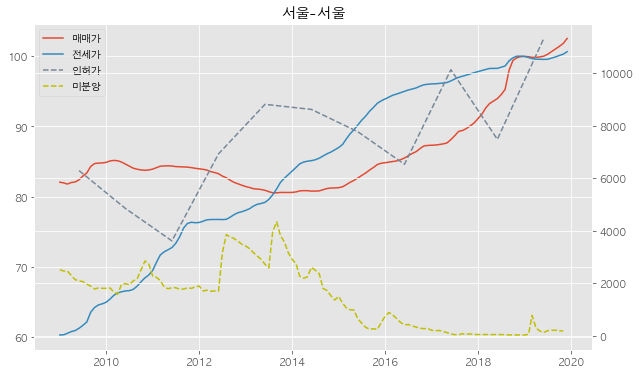

In [26]:
plt.figure(figsize=(10, 6))
ax = plt.subplot()
ax2 = ax.twinx()

si = '서울'
gu = '서울'

plt.title(si +'-' +gu)
ln1 = ax.plot(price_index[si][gu]['2009-1':], label='매매가')
ln2 = ax.plot(jun_index[si][gu]['2009-1':], label='전세가')
# 인허가 데이터는 scaling해줌 (정확한 값보다는 증감의 경향만 보기 위함)
ln3 = ax2.plot(modified_permission[si]['2009':]/10, label='인허가', color='lightslategray', ls='--')
ln4 = ax2.plot(transposed_unsold[si]['2009':], label='미분양', color='y', ls='--')
lns = ln1 + ln2 + ln3 + ln4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')
plt.show()

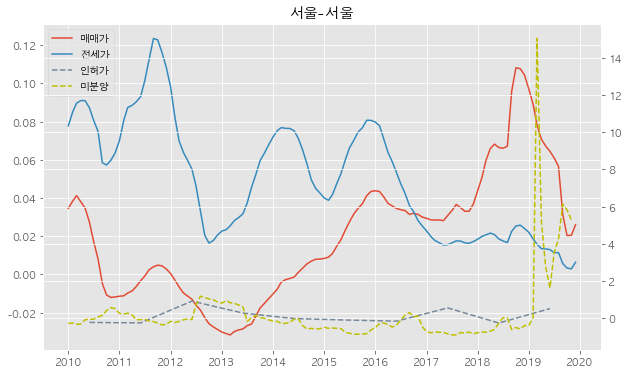

In [34]:
plt.figure(figsize=(10, 6))
ax = plt.subplot()
ax2 = ax.twinx()

si ='서울'
gu = '서울'

plt.title(si +'-' +gu)
ln1 = ax.plot(price_index[si][gu]['2009-1':].pct_change(12), label='매매가')
ln2 = ax.plot(jun_index[si][gu]['2009-1':].pct_change(12), label='전세가')
ln3 = ax2.plot(modified_permission[si]['2009':].pct_change(), label='인허가', color='lightslategray', ls='--')
ln4 = ax2.plot(transposed_unsold[si]['2009':].pct_change(12), label='미분양', color='y', ls='--')
lns = ln1+ln2+ln3+ln4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')
plt.show()

In [35]:
def demand(price_index, jeonse_index, index_date, time_range):

    prev_date = index_date - relativedelta(months=time_range)
    prev_date2 = index_date - relativedelta(months=time_range*3)

    demand_df = pd.DataFrame()
    demand_df['매매증감률'] = (price_index.loc[index_date] - price_index.loc[prev_date])/ price_index.loc[prev_date].replace(0,None)
    demand_df['전세증감률'] = (jeonse_index.loc[index_date] - jeonse_index.loc[prev_date])/jeonse_index.loc[prev_date].replace(0,None)
    demand_df['이전최대값'] = price_index[prev_date2:index_date][:-1].max()
    demand_df['최댓값대비증감률'] = (price_index.loc[index_date] - demand_df['이전최대값']) /demand_df['이전최대값'].replace(0,None)

    demand_df['매매가상승'] = demand_df['매매증감률'] > 0.01
    demand_df['전세가상승'] = demand_df['전세증감률'] > 0.01
    demand_df['더빠른전세상승'] = demand_df['전세증감률'] > demand_df['매매증감률']
    demand_df['최댓값대비상승'] = demand_df['최댓값대비증감률'] > 0
    demand_df['수요총합'] = demand_df[['매매가상승','전세가상승','더빠른전세상승','최댓값대비상승']].sum(axis=1)

    demand_df = demand_df[demand_df['수요총합'] == 4]

    seleted_index = []

    for name in demand_df.index:
        if name[0] is not name[1]:
            seleted_index.append((name[0], name[1]))

    demand_df = demand_df.loc[seleted_index]
    
    return demand_df

In [37]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [38]:
index_date = datetime(2013, 1,1)
time_range=12
demand_1 = demand(price_index, jun_index, index_date, time_range)

In [39]:
prev_date = index_date - relativedelta(months=time_range)
prev_date2 = index_date - relativedelta(months = time_range * 3)
graph_start = index_date - relativedelta(months=time_range * 3)


In [40]:
num_row = int((len(demand_1.index)-1)/2)+1

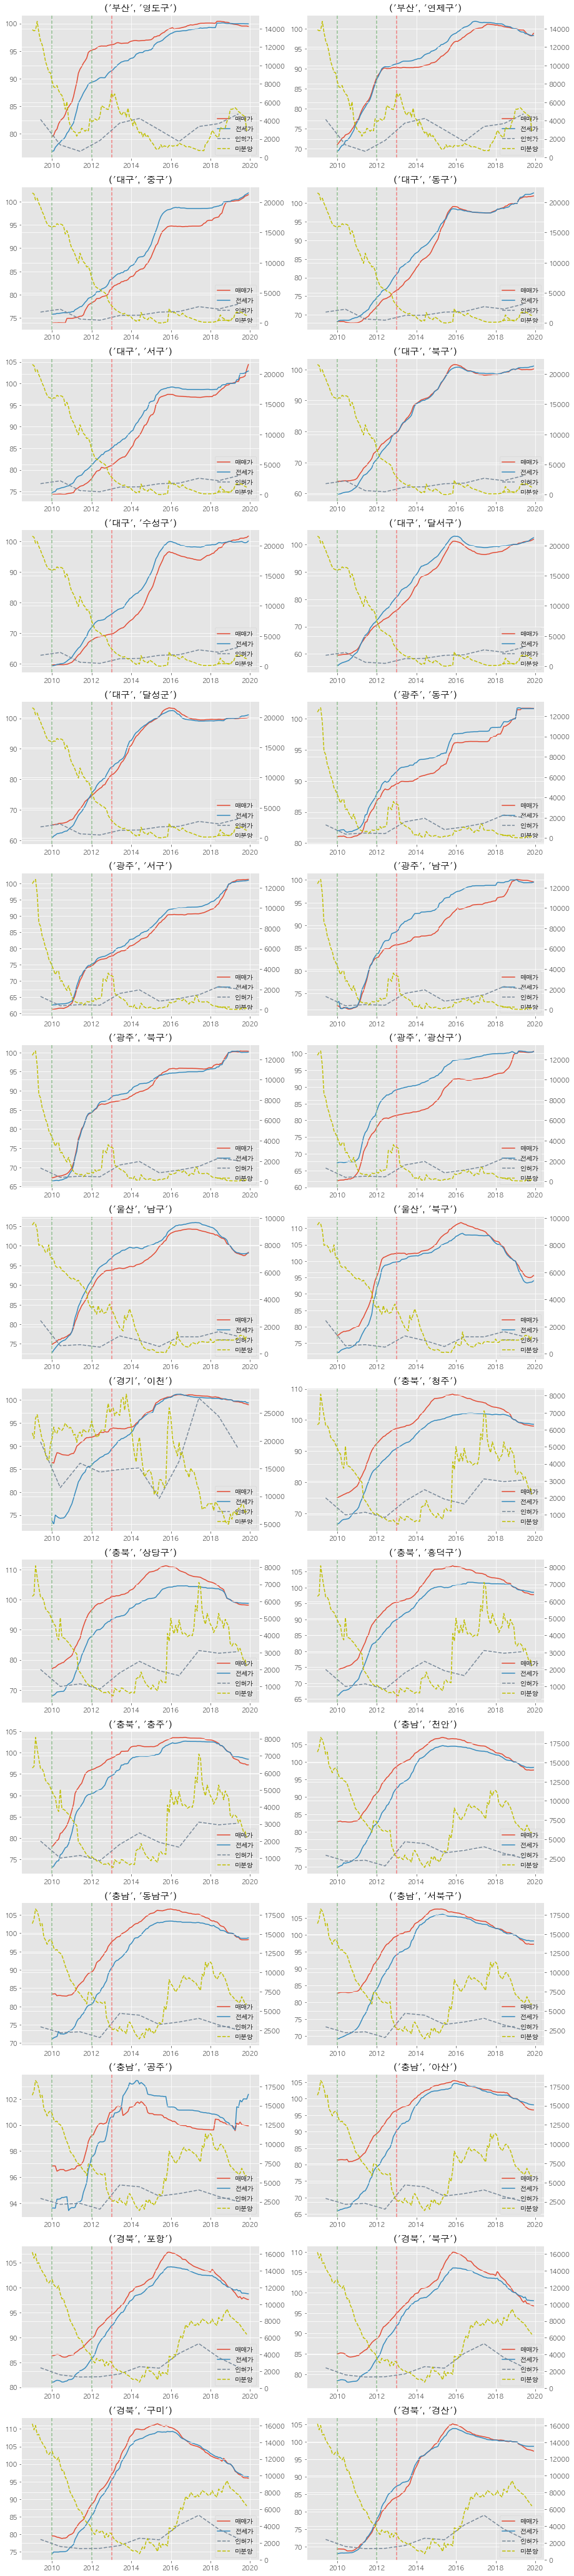

In [43]:
plt.figure(figsize=(15, num_row * 5))
for i, spot in enumerate(demand_1.index):
    ax = plt.subplot(num_row, 2, i+1)
    si = spot[0]
    gu = spot[1]
    plt.title(spot)
    ax2 = ax.twinx()
    ln1 = ax.plot(price_index[si][gu][graph_start:], label='매매가')
    ln2 = ax.plot(jun_index[si][gu][graph_start:], label='전세가')
    ln3 = ax2.plot(modified_permission[si]['2009':]/10, label='인허가', color='lightslategray', ls='--')
    ln4 = ax2.plot(transposed_unsold[si]['2009':], label='미분양', color='y', ls='--')
    ax.axvline(x=index_date, color='lightcoral', linestyle='--')
    ax.axvline(x=prev_date, color='darkseagreen', linestyle='--')
    ax.axvline(x=prev_date2, color='darkseagreen', linestyle='--')
    lns = ln1 + ln2 + ln3 + ln4
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc='lower right')
plt.show()